In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 그래프에 한글 설정
plt.rcParams['font.family']='Malgun Gothic'

# 그래프에 마이너스 기호 깨지는 문제 해결
plt.rcParams['axes.unicode_minus'] = False

#df_order1 = pd.read_excel (r'3.1 주문정보(개인정보 제외)_추출.xlsx')
#df_payment1 = pd.read_excel (r'4.1 결제정보(개인정보 제외)_추출.xlsx')
#df_customer1 = pd.read_excel (r'1.1 고객기본정보(개인정보 제외)_추출.xlsx')
df_item1 = pd.read_excel (r'2.1 상품정보_추출.xlsx')
df_refund1 = pd.read_excel (r'5.1 환불정보(개인정보 제외)_추출.xlsx')


# 주문 정보
- 주문 건수 : 24766
- 구매 확정 : 19161

In [2]:
# 환불 정보
df_refund1.head()

,주문번호,환불번호,진행구분,결제수단,환불금액,할부개월,환불일자
0,1709061012340050,17,취소,신용카드,37000.0,0.0,2017-09-06 10:14:22
1,1709111558160149,48,취소,가상계좌,6850.0,NaN,2017-09-12 16:42:22
2,1709121552530178,71,취소,가상계좌,249500.0,NaN,2017-09-12 15:56:20
3,1709211749040335,121,취소,가상계좌,409200.0,NaN,2017-09-21 17:51:50
4,1709221305150350,128,취소,신용카드,12060.0,0.0,2017-09-22 13:12:27


In [3]:
df_refund1.dtypes

주문번호             int64
환불번호             int64
진행구분            object
결제수단            object
환불금액           float64
할부개월           float64
환불일자    datetime64[ns]
dtype: object

In [4]:
df_refund1.shape

(3790, 7)

In [5]:
df_refund1.isnull().sum()

주문번호       0
환불번호       0
진행구분       0
결제수단       0
환불금액       0
할부개월    1941
환불일자       0
dtype: int64

In [6]:
df_refund1['환불일'] = df_refund1['환불일자'].dt.date
df_refund1['환불월'] = df_refund1['환불일자'].dt.month
df_refund1['환불년도'] = df_refund1['환불일자'].dt.year

In [7]:
df_refund1.head()

,주문번호,환불번호,진행구분,결제수단,환불금액,할부개월,환불일자,환불일,환불월,환불년도
0,1709061012340050,17,취소,신용카드,37000.0,0.0,2017-09-06 10:14:22,2017-09-06,9,2017
1,1709111558160149,48,취소,가상계좌,6850.0,NaN,2017-09-12 16:42:22,2017-09-12,9,2017
2,1709121552530178,71,취소,가상계좌,249500.0,NaN,2017-09-12 15:56:20,2017-09-12,9,2017
3,1709211749040335,121,취소,가상계좌,409200.0,NaN,2017-09-21 17:51:50,2017-09-21,9,2017
4,1709221305150350,128,취소,신용카드,12060.0,0.0,2017-09-22 13:12:27,2017-09-22,9,2017


In [8]:
df_refund1.groupby('환불일').환불일자.count()

환불일
2017-08-25     1
2017-09-06     3
2017-09-11     3
2017-09-12     9
2017-09-21     5
              ..
2018-11-03     4
2018-11-04     4
2018-11-05    23
2018-11-06    30
2018-11-07     4
Name: 환불일자, Length: 324, dtype: int64

In [9]:
# 환부일시 별 주문 건수 추출
df_refund1_count = df_refund1.groupby('환불일').환불일자.count().to_frame()
df_refund1_count

,환불일자
환불일,
2017-08-25,1
2017-09-06,3
2017-09-11,3
2017-09-12,9
2017-09-21,5
...,...
2018-11-03,4
2018-11-04,4
2018-11-05,23


In [10]:
# 주문일자별 주문건수 시각화
df_refund1_count.columns = ['환불건수']
df_refund1_count

,환불건수
환불일,
2017-08-25,1
2017-09-06,3
2017-09-11,3
2017-09-12,9
2017-09-21,5
...,...
2018-11-03,4
2018-11-04,4
2018-11-05,23


In [11]:
df_refund1_count.index

Index([2017-08-25, 2017-09-06, 2017-09-11, 2017-09-12, 2017-09-21, 2017-09-22,
       2017-09-24, 2017-09-25, 2017-09-26, 2017-09-27,
       ...
       2018-10-29, 2018-10-30, 2018-10-31, 2018-11-01, 2018-11-02, 2018-11-03,
       2018-11-04, 2018-11-05, 2018-11-06, 2018-11-07],
      dtype='object', name='환불일', length=324)

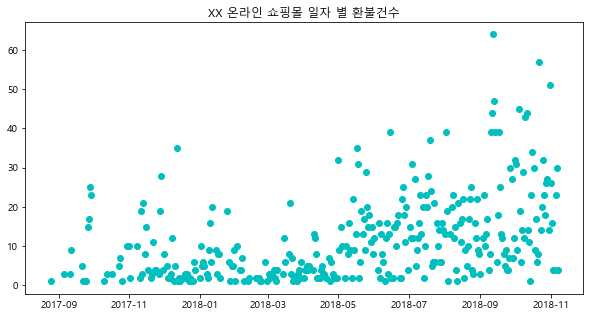

In [12]:
plt.rcParams['figure.figsize']=(10,5)

plt.scatter(df_refund1_count.index, df_refund1_count, marker = 'o', color = 'c')
plt.title('XX 온라인 쇼핑몰 일자 별 환불건수')
plt.show()

In [13]:
# 년도 별 환불
df_refund1_2017 = df_refund1 [df_refund1['환불년도'] == 2017]
df_refund1_2018 = df_refund1 [df_refund1['환불년도'] == 2018]

In [14]:
# 년도 별 환불 건수 추출
df_refund1_2017_count = df_refund1_2017.groupby('환불월').환불일자.count().to_frame()
df_refund1_2018_count = df_refund1_2018.groupby('환불월').환불일자.count().to_frame()

In [15]:
df_refund1_2017_count

,환불일자
환불월,
8,1
9,103
10,30
11,172
12,102


In [16]:
df_refund1_2018_count.head()

,환불일자
환불월,
1,159
2,43
3,98
4,105
5,405


In [17]:
# 년도 별 주문건수 시각화
df_refund1_2017_count.columns = ['환불건수']
df_refund1_2018_count.columns = ['환불건수']
df_refund1_2018_count

,환불건수
환불월,
1,159
2,43
3,98
4,105
5,405
6,327
7,459
8,411
9,549


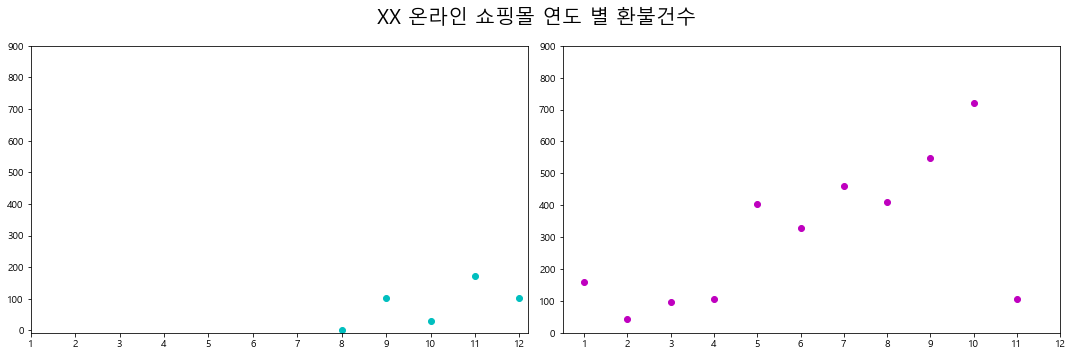

In [18]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.scatter(df_refund1_2017_count.index, df_refund1_2017_count.values, marker = 'o', color = 'c')
ax2.scatter(df_refund1_2018_count.index, df_refund1_2018_count.values, marker = 'o', color = 'm')

ax1.set_xticks(range(1,13))
ax2.set_xticks(range(1,13))

ax1.set_yticks(range(0,1000,100))
ax2.set_yticks(range(0,1000,100))

fig.suptitle('XX 온라인 쇼핑몰 연도 별 환불건수', size=20)
fig.tight_layout()

plt.show()